In [1]:
#Program Name: Daily-XChart-matplotlib-bar plot
#Purpose:  Chart scatter line box aggr table data
#Author:  Greg Turmel, Director, Data Governance 
#Date:    2020.08.30 - 2021.06.30
#Errata:  0.1 Improvements can be made to script using for/looping through the databases

import os, sys, argparse, csv, pyodbc, sql, time, datetime
import sqlalchemy as db
from dotenv import load_dotenv # add this line
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import altair as alt
from altair import Chart, X, Y, Axis, SortField
from vega_datasets import data as vega_data
import datapane as dp
#import datatable as dt
import numpy as np
import matplotlib # notebook
import matplotlib.pyplot as plt
import seaborn as sns
#import chart_studio.plotly as py
import plotly.graph_objects as go
load_dotenv() # add this line
user = os.getenv('MySQLeUser')
password = os.getenv('MySQLeUserPass')
host = os.getenv('MySQLeHOST')
db = os.getenv('MySQLeDB')
%matplotlib inline
%load_ext sql

In [2]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DEVODSSQL;'
                      'Database=Greg;'
                      'Trusted_Connection=yes;')

sql_query01 = pd.read_sql_query(''' 
select DISTINCT TableName
FROM [dbo].[tableRowCountApplicationData]
ORDER BY TableName;     
                              '''
                              ,conn) # Load the list of distinct tables to graph

sql_query02 = pd.read_sql_query(''' 
select *
FROM [dbo].[tableRowCountApplicationData]
ORDER BY TableName;     
                              '''
                              ,conn) # Load the list of distinct tables to graph


In [3]:
df = pd.DataFrame(sql_query02)
df = df.astype({'TodaysDate':np.int64,'RecordCount':np.int64})
df = df.sort_values(by=['TableName','SchemaName','DatabaseName','TodaysDate'], ascending=[True,True,True,True])
df = df.reset_index(drop=True)

In [4]:
df.dtypes

TodaysDate       int64
DatabaseName    object
SchemaName      object
TableName       object
RecordCount      int64
Ddifference      int64
dtype: object

In [5]:
df.columns

Index(['TodaysDate', 'DatabaseName', 'SchemaName', 'TableName', 'RecordCount',
       'Ddifference'],
      dtype='object')

In [6]:
dfappdata0001 = df[(df['DatabaseName'] == 'ApplicationData') & (df['SchemaName'] == 'ABC') & (df['TableName'] == 'ClasStuABCYrSum')]

In [7]:
dfappdata0001.head()

TodaysDate     DatabaseName SchemaName        TableName  RecordCount  \
1530    20201223  ApplicationData        ABC  ClasStuABCYrSum      3141587   
1531    20201224  ApplicationData        ABC  ClasStuABCYrSum      3141539   
1532    20201225  ApplicationData        ABC  ClasStuABCYrSum      3141538   
1533    20201226  ApplicationData        ABC  ClasStuABCYrSum      3141538   
1534    20201228  ApplicationData        ABC  ClasStuABCYrSum      3141536   

      Ddifference  
1530            0  
1531          -48  
1532           -1  
1533            0  
1534           -2

In [8]:
dataTypeSeries = dfappdata0001.dtypes
print(dataTypeSeries)

TodaysDate       int64
DatabaseName    object
SchemaName      object
TableName       object
RecordCount      int64
Ddifference      int64
dtype: object


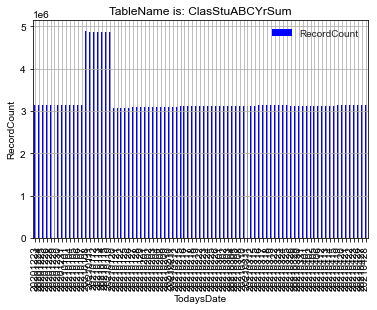

In [9]:
dfappdata0001.plot.bar(x='TodaysDate', y='RecordCount', color='b')

plt.grid(True)
plt.style.use('seaborn')
x = ('TodaysDate')
y = ('RecordCount')

plt.xlabel('TodaysDate', fontsize='10')
plt.ylabel('RecordCount', fontsize='10')

plt.title('TableName is: ClasStuABCYrSum')
plt.legend(loc='upper right')
plt.draw()
plt.show()
#plt.savefig('Figure 1.pdf')